## Aqui pegamos as taras e os coeficientes angulares relativos para corrigir os dados, de forma que os sensores leiam de forma igual o mesmo peso incidente.

In [1]:
import numpy as np
import pandas as pd

In [20]:
# corrigindo dados sem carga

raw_data = pd.read_csv('data/sem_carga',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data.drop('timestamp', inplace=True, axis=1)
# raw_data.drop('intern_clock', inplace=True, axis=1)
raw_data = raw_data.astype({1:"int", 2:"int", 3:"int", 4:"int", 5:"int", 6:"int", 7:"int", 8:"int"})
raw_data

,intern_clock,1,2,3,4,5,6,7,8
0,1857096,0,0,0,0,802141,2337943,-3715136,95644
1,1858100,0,0,0,0,802386,2338088,-3715503,95977
2,1859104,1,1,0,0,802689,2337952,-3715298,96241
3,1860108,0,0,0,0,802900,2337979,-3715180,96393
4,1861112,0,0,0,0,802992,2337956,-3715525,96209
...,...,...,...,...,...,...,...,...,...
258,2116124,0,0,0,0,816384,2336708,-3720851,94586
259,2117129,0,0,0,0,816383,2336631,-3721049,94728
260,2118132,0,1,0,0,816097,2336577,-3721211,94485
261,2119137,0,1,0,0,816609,2336239,-3721393,94464


In [3]:
tara = pd.read_csv("data/tara.csv")
correcao_angular = pd.read_csv("data/correcao_coeficientes_angulares.csv")

In [4]:
tara

,0
0,8.098834e+05
1,2.337495e+06
2,-3.719232e+06
3,9.581695e+04


In [21]:
tara_lista = list(tara.to_numpy().reshape(4,))
tara_lista.insert(0, 1)
tara_lista.insert(0, 1)
tara_lista.insert(0, 1)
tara_lista.insert(0, 1)
tara_lista.insert(0, 1)

correcao_angular_lista = list(correcao_angular.to_numpy().reshape(4,))
correcao_angular_lista.insert(0, 1)
correcao_angular_lista.insert(0, 1)
correcao_angular_lista.insert(0, 1)
correcao_angular_lista.insert(0, 1)
correcao_angular_lista.insert(0, 1)

In [22]:
data = raw_data.apply(lambda x: - x + tara_lista, axis=1)
data["intern_clock"] = - data["intern_clock"]
# data["timestamp"] = - data["timestamp"]
data = data.apply(lambda x: x/correcao_angular_lista, axis=1)


In [23]:
data

,intern_clock,1,2,3,4,5,6,7,8
0,1857095.0,1.0,1.0,1.0,1.0,7742.425856,-712.788867,-5147.542858,207.931268
1,1858099.0,1.0,1.0,1.0,1.0,7497.425856,-943.242220,-4686.368695,-192.411963
2,1859103.0,0.0,0.0,1.0,1.0,7194.425856,-727.092868,-4943.972791,-509.801191
3,1860107.0,1.0,1.0,1.0,1.0,6983.425856,-770.004872,-5092.252222,-692.540444
4,1861111.0,1.0,1.0,1.0,1.0,6891.425856,-733.450202,-4658.723377,-471.329769
...,...,...,...,...,...,...,...,...,...
258,2116123.0,1.0,1.0,1.0,1.0,-6500.574144,1250.037967,2033.956706,1479.892645
259,2117128.0,1.0,1.0,1.0,1.0,-6499.574144,1372.416645,2282.764564,1309.175712
260,2118131.0,1.0,0.0,1.0,1.0,-6213.574144,1458.240652,2486.334631,1601.318070
261,2119136.0,1.0,0.0,1.0,1.0,-6725.574144,1995.435364,2715.036804,1626.564940


In [24]:
data.sum()/data.shape[0]


intern_clock    1.988617e+06
1               7.414449e-01
2               6.577947e-01
3               9.847909e-01
4               9.467681e-01
5               4.869082e-12
6               1.547593e-10
7              -2.380317e-10
8              -2.062443e-11
dtype: float64

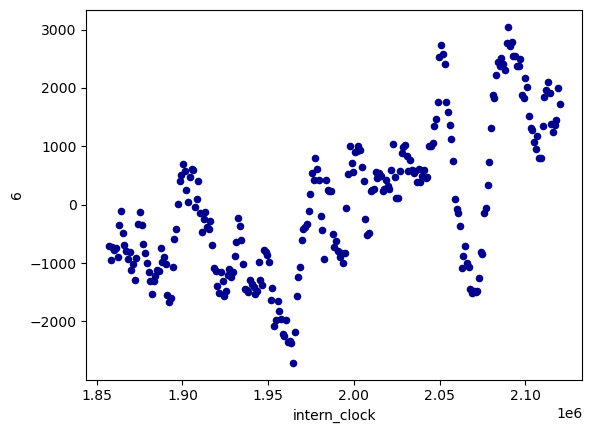

In [25]:
ax1 = data.plot.scatter(x='intern_clock',
                      y=6,
                      c='DarkBlue')

funcionou!

## Precisa verificar se as contas estão corretas!!!

In [28]:
# corrigindo dados sem carga

raw_data = pd.read_csv('data/com_garrafao_no_centro',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data.drop('timestamp', inplace=True, axis=1)
# raw_data.drop('intern_clock', inplace=True, axis=1)
raw_data = raw_data.astype({1:"int", 2:"int", 3:"int", 4:"int", 5:"int", 6:"int", 7:"int", 8:"int"})
raw_data

,intern_clock,1,2,3,4,5,6,7,8
0,1420357,0,0,0,0,625080,2241356,-3838457,-32647
1,1421362,0,0,0,1,625402,2241219,-3838563,-32551
2,1422365,0,0,0,0,625585,2241310,-3838803,-32209
3,1423370,2,1,0,0,625978,2241331,-3838797,-32217
4,1424373,0,0,0,0,626355,2241541,-3838423,-32305
...,...,...,...,...,...,...,...,...,...
368,1789829,1,2,0,0,683691,2243088,-3843122,-28880
369,1790832,0,0,0,1,683567,2243382,-3842770,-28914
370,1791837,0,0,0,0,683702,2243418,-3842754,-28871
371,1792840,0,0,0,0,684013,2243223,-3842683,-29353


In [29]:
data1 = raw_data.apply(lambda x: - x + tara_lista, axis=1)
data1["intern_clock"] = - data["intern_clock"]
data1 = data1.apply(lambda x: x/correcao_angular_lista, axis=1)


In [30]:
data1

,intern_clock,1,2,3,4,5,6,7,8
0,-1857095.0,1.0,1.0,1.0,1.0,184803.425856,152796.162915,149818.285248,154443.467192
1,-1858099.0,1.0,1.0,1.0,0.0,184481.425856,153013.901601,149951.485415,154328.052927
2,-1859103.0,1.0,1.0,1.0,1.0,184298.425856,152869.272255,150253.070699,153916.889608
3,-1860107.0,-1.0,0.0,1.0,1.0,183905.425856,152835.896252,150245.531067,153926.507464
4,-1861111.0,1.0,1.0,1.0,1.0,183528.425856,152502.136224,149775.560666,154032.303873
...,...,...,...,...,...,...,...,...,...
368,NaN,0.0,-1.0,1.0,1.0,126192.425856,150043.437347,155680.349196,149914.659529
369,NaN,1.0,1.0,1.0,0.0,126316.425856,149576.173307,155238.024114,149955.535415
370,NaN,1.0,1.0,1.0,1.0,126181.425856,149518.957302,155217.918428,149903.839442
371,NaN,1.0,1.0,1.0,1.0,125870.425856,149828.877329,155128.699448,150483.315230


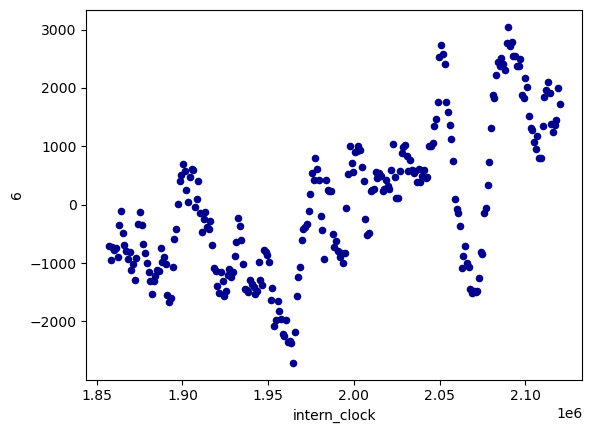

In [31]:
ax1 = data.plot.scatter(x='intern_clock',
                      y=6,
                      c='DarkBlue')

## ja sei como corrigir dados, agora basta aplicar!

In [35]:
# corrigindo dados sem carga

raw_data = pd.read_csv('data/com_carga_de_livro',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data.drop('timestamp', inplace=True, axis=1)
# raw_data.drop('intern_clock', inplace=True, axis=1)
raw_data = raw_data.astype({1:"int", 2:"int", 3:"int", 4:"int", 5:"int", 6:"int", 7:"int", 8:"int"})
raw_data

,intern_clock,1,2,3,4,5,6,7,8
0,2579975,129,1,212,1,2724556,2302420,-3791356,50505
1,2580979,107,0,278,1,2724904,2153849,-3769052,-194853
2,2581983,138,8,258,1,2529145,2234550,-3914239,-134918
3,2582987,150,12,146,1,2456496,2337239,-3958799,56505
4,2583992,162,1,272,1,2471575,2282999,-3896257,-100810
...,...,...,...,...,...,...,...,...,...
72,2652275,0,155,223,1,2774067,2190883,-3811134,-261348
73,2653280,0,159,263,1,2700143,2179692,-3965504,-239087
74,2654283,0,175,0,66,2872345,2116642,-3781286,-126617
75,2655288,129,183,1,44,2822626,2030157,-3888903,-110136


In [36]:
data2 = raw_data.apply(lambda x: - x + tara_lista, axis=1)
data2["intern_clock"] = - data2["intern_clock"]
data2 = data2.apply(lambda x: x/correcao_angular_lista, axis=1)


In [37]:
data2

,intern_clock,1,2,3,4,5,6,7,8
0,2579974.0,-128.0,0.0,-211.0,0.0,-1.914673e+06,55745.103957,90630.916758,54475.478143
1,2580978.0,-106.0,1.0,-277.0,0.0,-1.915021e+06,291873.966798,62603.591079,349452.698860
2,2581982.0,-137.0,-7.0,-257.0,0.0,-1.719262e+06,163613.166506,245046.351721,277396.928420
3,2582986.0,-149.0,-11.0,-145.0,0.0,-1.646613e+06,406.101895,301040.686023,47262.086591
4,2583991.0,-161.0,0.0,-271.0,0.0,-1.661692e+06,86611.549261,222450.074356,236391.201913
...,...,...,...,...,...,...,...,...,...
72,2652274.0,1.0,-154.0,-222.0,0.0,-1.964184e+06,233014.591103,115484.057328,429395.110730
73,2653279.0,1.0,-158.0,-262.0,0.0,-1.890260e+06,250800.821956,309466.224880,402632.225842
74,2654282.0,1.0,-174.0,1.0,-65.0,-2.062462e+06,351008.297184,77976.900905,267417.201208
75,2655287.0,-128.0,-182.0,0.0,-43.0,-2.012743e+06,488461.802261,213208.998627,247603.216848


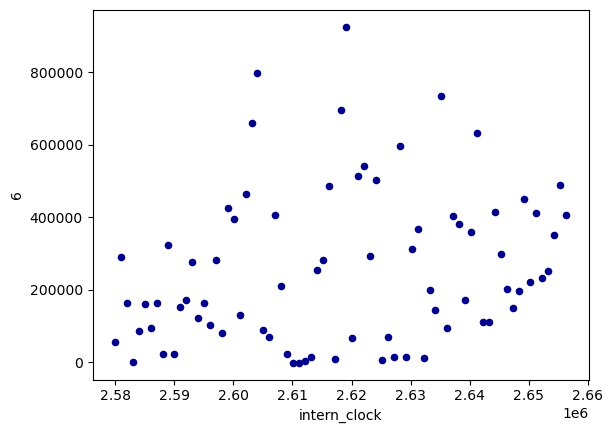

In [38]:
ax1 = data2.plot.scatter(x='intern_clock',
                      y=6,
                      c='DarkBlue')

In [39]:
data2.to_csv('data/com_carga_de_livro_corrigido.csv', index = False)